<a href="https://colab.research.google.com/github/aakashthakur1802/Datathon/blob/main/dPhi_taxpayer's_political_party_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Content**:

A tax is a compulsory financial charge or some other type of levy imposed on a taxpayer (an individual or legal entity) by a governmental organization in order to fund government spending and various public expenditures.

**Objective**:

You are required to build a machine learning model that would predict the political party to which a taxpayer belongs to.

**About the Data**:

The dataset contains information about US taxpayers. There are 10 independent columns and 1 dependent column. This dataset includes attributes like household income, household debt level, if the taxpayer is married or not, how many cars their household has, if they filed their taxes in the last three years or not.

**Data Description**

HHI: Household income

HHDL: Household debt level

Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.

PoliticalParty: Name of the political party

CollegeGrads: Grade in College out of 5

AHHAge: Average household age

cars: number of cars in house

Filed in YYYY: Tax filed in given year YYYY

**Import Libraries**

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

**Load Data**

In [79]:
train_df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
test_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


**Exploratory Data Analysis**

In [82]:
train_df.describe(include='all')

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812,NaN
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029,NaN
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000,NaN


In [83]:

test_df.describe(include='all')

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


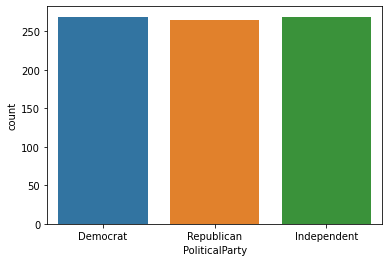

In [84]:
sns.countplot(train_df['PoliticalParty'])

In [85]:
train_df.tail()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican
802,635,189020,839546,2,4,56,1,0,0,0,Republican


In [86]:
test_df.tail()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
196,51,138204,144986,1,1,63,1,1,1,0
197,705,73250,-810927,0,5,40,1,1,0,1
198,542,134376,352116,0,2,86,1,1,0,0
199,929,70820,260337,0,3,78,3,1,0,1
200,528,114510,930683,2,1,38,0,0,0,1


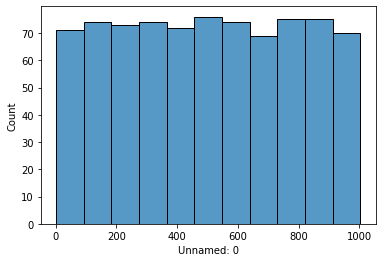

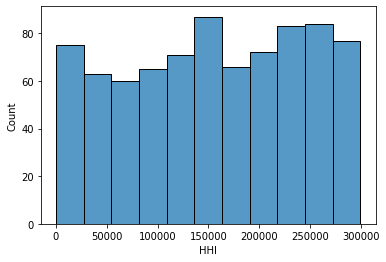

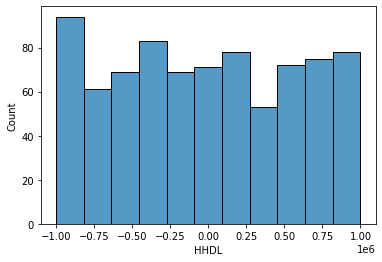

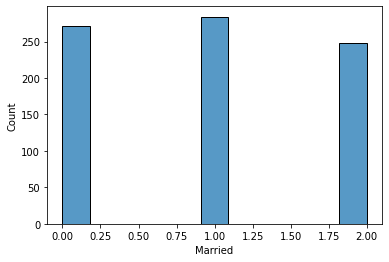

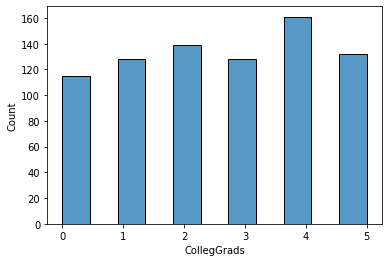

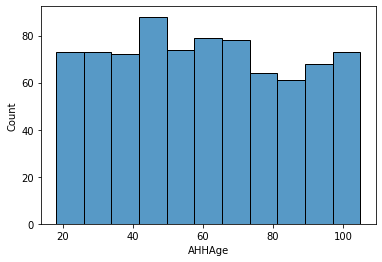

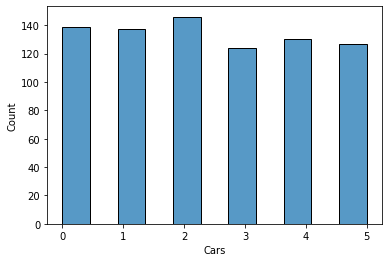

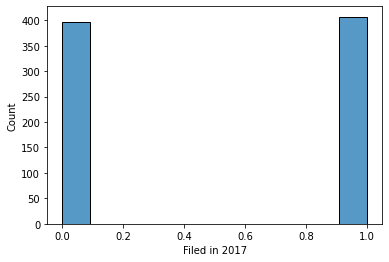

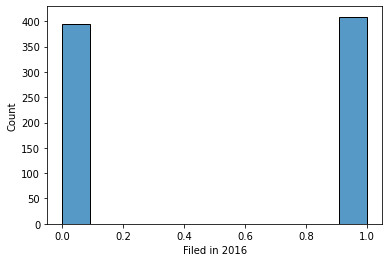

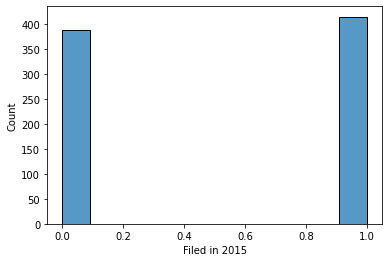

In [87]:
for i in train_df.columns[:-1]:
    sns.histplot(train_df[i]);
    plt.show()


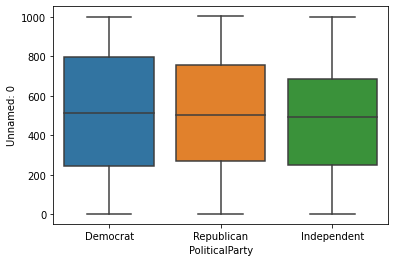

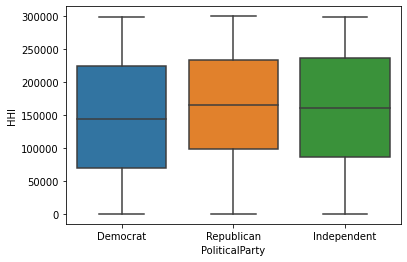

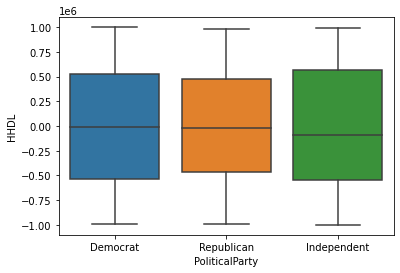

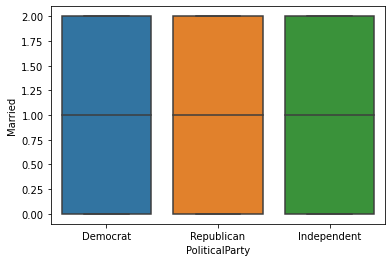

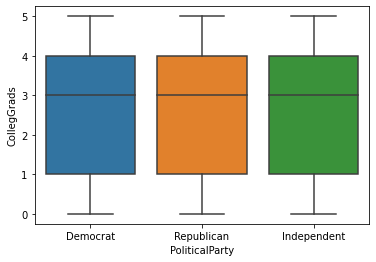

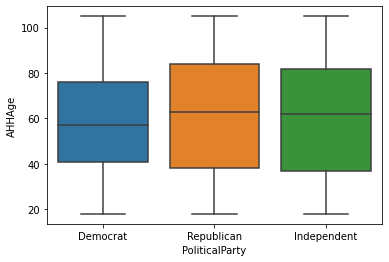

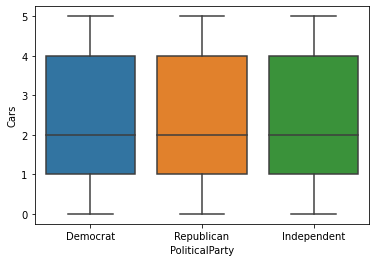

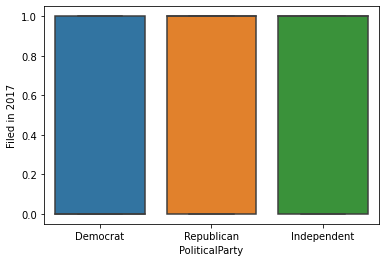

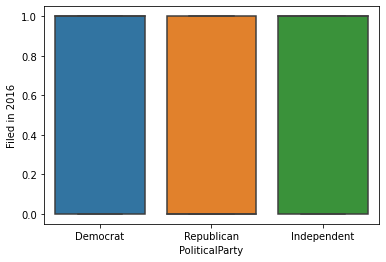

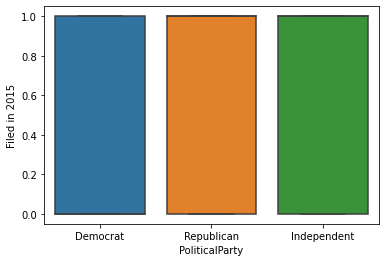

In [88]:
for i in train_df.columns[:-1]:
    sns.boxplot(x='PoliticalParty',y=i,data=train_df);
    plt.show()

**Model Building**

In [89]:
label_encoder = LabelEncoder() 
train_df['PoliticalParty']= label_encoder.fit_transform(train_df['PoliticalParty']) 
train_df['PoliticalParty'].unique() 

array([0, 2, 1])

In [90]:
X=train_df.drop(['PoliticalParty','Unnamed: 0'],axis=1)
test_df=test_df.drop('Unnamed: 0',axis=1)
y=train_df['PoliticalParty']

In [91]:
from sklearn.feature_selection import VarianceThreshold
df_var = VarianceThreshold()
df_var.fit_transform(X)
for feature in zip(X.columns, df_var.variances_):
    print(feature)

('HHI', 299189.0)
('HHDL', 1999622.0)
('Married', 0.6455058784849469)
('CollegGrads', 2.8037760018858298)
('AHHAge', 87.0)
('Cars', 2.89843969299436)
('Filed in 2017', 0.24995308688309245)
('Filed in 2016', 0.24991276486525474)
('Filed in 2015', 0.2497173581634251)


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
test_df=pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

**Decision Tree Algorithm**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy.random import seed
seed(0)
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']],y,test_size = 0.2,random_state=21,stratify=y)
dt=DecisionTreeClassifier(criterion='gini',max_depth=14)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14)

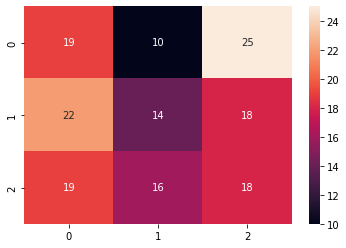

In [94]:
pred=dt.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [95]:
accuracy_score(Y_test,pred)

0.3167701863354037

**Random Forest Algorithm**

In [96]:
rf=RandomForestClassifier(random_state=21)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=21)

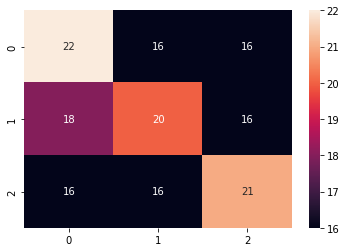

In [97]:
pred=rf.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [98]:
accuracy_score(Y_test,pred)

0.391304347826087

Based on the 2 classification models, Random Forest has the highest accuracy

**Submitted prediction File**

In [99]:
# To create Dataframe of predicted value with particular respective index
target=rf.predict(test_df[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":target})
df['prediction']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
# To download the csv file locally
from google.colab import files
df.to_csv('prediction_results.csv', index = False)         
files.download('prediction_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>